In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import os
import sys
sys.path.append(f'{os.environ["HOME"]}/Projects/planckClusters/catalogs')
from load_catalogs import load_PSZcatalog, load_extraCatalogs

In [2]:
def plot_mwd(ra, dec, org=0, ax=None, projection='mollweide', **kwargs):              
    ''' RA, Dec are arrays of the same length.                                 
        RA takes values in [0,360), Dec in [-90,90], which represent angles in degrees.                                         
        org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).     
        title is the title of the figure.                                          
        projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'                                                                  
                                                                               
    '''
    
    if isinstance(ra, float):
        ra = [ra]
    if isinstance(dec, float):
        dec = [dec]
    
    if not isinstance(ra, np.ndarray):
        ra = np.array(ra)
    
    if not isinstance(dec, np.ndarray):
        dec = np.array(dec)
    
    x = np.remainder(ra + 360 - org, 360)  # shift RA values                  
    ind = x > 180                                                              
    x[ind] -= 360  # scale conversion to [-180, 180]                           
    x = -x  # reverse the scale: East to the left                              
    
    new = False
    if not ax:
        fig = plt.figure(figsize=(10, 5))                                          
        ax = fig.add_subplot(111, projection=projection)
        tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
        tick_labels = np.remainder(tick_labels + 360 + org, 360)
        tick_labels = [f'{t}$^\degree$' for t in tick_labels]
        ax.set_xticklabels(tick_labels)  # we add the scale on the x axis
        ax.set_xlabel("RA", fontsize=12)
        ax.set_ylabel("Dec", fontsize=12)
        ax.grid(True)
        new = True
    
    ax.scatter(np.radians(x), np.radians(dec), **kwargs)  # convert degrees to radians

    
    if new:
        return fig, ax
    else:
        return ax
    

<IPython.core.display.Javascript object>


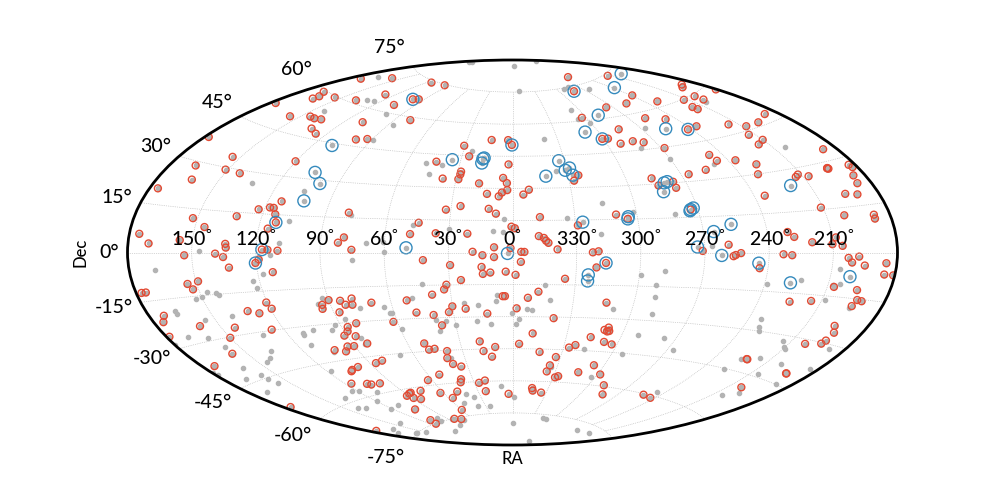

/home/boada/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
/home/boada/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: TableReplaceWarning: converted column 'Nspec' from integer to float
/home/boada/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: TableReplaceWarning: converted column 'R' from integer to float
/home/boada/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: TableReplaceWarning: converted column 'N' from integer to float
/home/boada/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: TableReplaceWarning: converted column 'ID' from integer to float
/home/boada/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater


In [3]:
# get file data
data = load_PSZcatalog()
data = data.sort_index(axis=1)

datapath = '../data_full'

# check to see which fields have XRT data
field_mask = [True if os.path.isdir(f'../data_full/{n.replace(" ", "_")}') else False for n in data['NAME']]

f, ax = plot_mwd(data['RA'][field_mask], data['DEC'][field_mask], marker='.', color='0.7', projection='aitoff')

# redshift mask
redshift_mask = (data['REDSHIFT'].values > 0) & (field_mask)

ax = plot_mwd(data['RA'][redshift_mask], data['DEC'][redshift_mask], ax=ax, marker='o', facecolor='none', s=25,
                  edgecolor='#E24A33', projection='aitoff')

# extras mask
data_barrena = load_extraCatalogs('barrena2018', merge=True)
data_aguado = load_extraCatalogs('aguado-barahona2019', merge=True)
data_streb = load_extraCatalogs('streblyanska2019', merge=True)
data_zohren = load_extraCatalogs('zohren2019', merge=True)              
extras_mask = ((data_barrena.z_cl.values > 0) | (data_aguado.z_cl.values > 0) | 
               (data_streb.z_spec.values > 0) | (data_zohren.z_spec.values > 0))
                                    
extras_mask = (extras_mask) & (field_mask)
                                    
ax = plot_mwd(data['RA'][extras_mask], data['DEC'][extras_mask], ax=ax, marker='o', facecolor='none', s=75, 
                  edgecolor='#348ABD')

In [4]:
legend_elements = [Line2D([0], [0], linewidth=0,marker='.', color='0.7', label='PSZ Cluster or Candidate'),
                   Line2D([0], [0], linewidth=0, marker='o', markerfacecolor='none', markeredgecolor='#E24A33', 
                          label='PSZ Confirmed'), 
                   Line2D([0], [0], linewidth=0, marker='o', markerfacecolor='none', markeredgecolor='#348ABD', 
                          label='External Confirmed'),  
                  ]
ax.legend(handles=legend_elements, frameon=True)

In [5]:
plt.tight_layout()

In [6]:
plt.savefig('sky_dist.pdf', bbox='tight')